In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic

## Optimization

In [2]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, x0=2)
res.x

array([2.99999999])

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

<p align="center">
  <img src="../images/opt_reg.PNG" alt="drawing" width="300" align="center"/>
</p>

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [4]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [5]:
res.x

array([1.4, 1.7])

Note use of different techniques for different problems.

In [6]:
#minimize?

## Interpolation

Suppose you have the following data (I generate it here, but perhaps you collect $x$ and $y$ by means of some experiment)

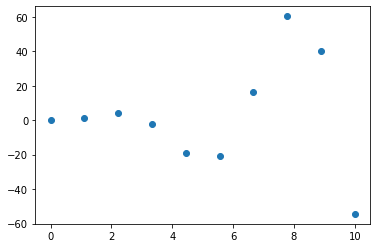

In [7]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between.

In [8]:
from scipy.interpolate import interp1d

In [9]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

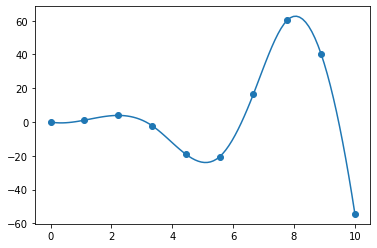

In [10]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

## Curve Fitting

Trivial Example

In [11]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

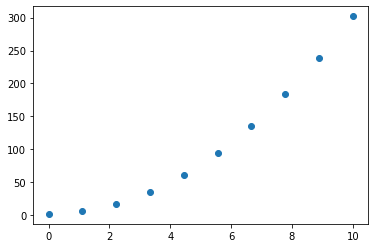

In [12]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [13]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt

array([3., 2.])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [14]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

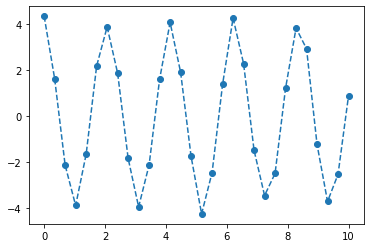

In [15]:
plt.plot(t_data,y_data,'o--')

$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is

* $\omega = 2 \pi (1/2) = \pi$
* $A=4$
* $\phi = 0$

In [16]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836219, 2.9989952 , 0.10411352])

In [17]:
A, w, phi = popt

In [18]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

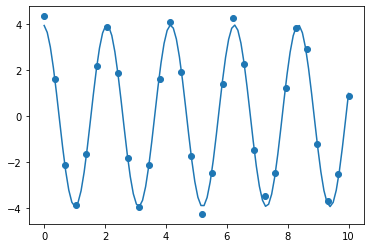

In [19]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

The parameters

In [20]:
popt

array([3.94836219, 2.9989952 , 0.10411352])

The estimated error on the parameters

In [21]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575702])

## Special Functions

Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

* The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

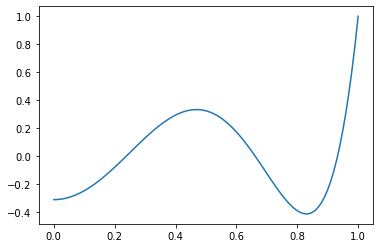

In [22]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

* Laplace's Equation in Polar Coordinates

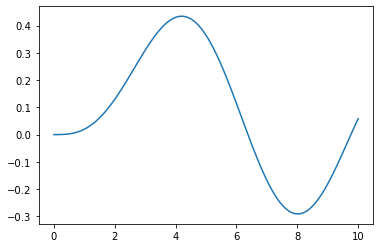

In [23]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show()

# Calculus

## Differentiation

In [24]:
from scipy.misc import derivative

In [25]:
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)

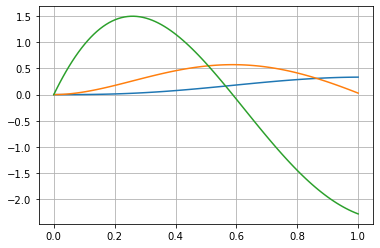

In [26]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))
plt.grid()

## Integration

Single integrals

$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [27]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [28]:
integral

0.14558175869954834

Double integrals

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [29]:
from scipy.integrate import dblquad
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [30]:
integral

0.590090324408853

## Differetial Equations

**一阶常微分方程**

下落时的空气摩擦**一阶常微分方程 空气摩擦

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [31]:
from scipy.integrate import odeint

All information about differential equation

In [32]:
def dvdt(v, t):
    return 3*v**2 - 5
v0 = 0

Solve differential equation

In [33]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

In [34]:
v_sol = sol.T[0]

Plot

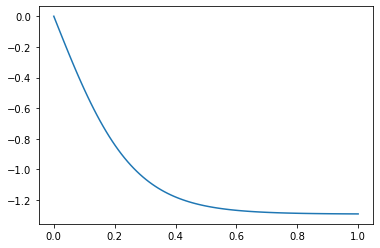

In [35]:
plt.plot(t, v_sol)

**Coupled first order ODEs**

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [36]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [37]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [38]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

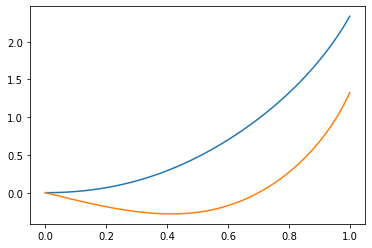

In [39]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

**Second Order ODEs**

Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$

Scipy can only solve coupled first order ODEs, but **any second order ODE can be turned into two coupled first order ODEs**. The same thing goes for higher order ODEs. 

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$
$$d \theta / dt = \omega $$

Let $S = (\theta, \omega)$

In [40]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
           np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [41]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

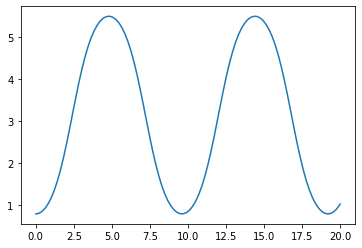

In [42]:
plt.plot(t, theta)
plt.show()

## Fourier Transforms

The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$

* $k/N$ represents a specific frequency (dimensionless)
* can be converted to a frequency (Hz) if you know the spacing in $x$

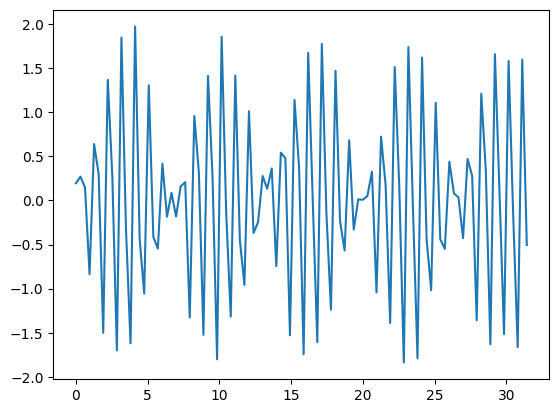

In [2]:
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(x, y)

In [3]:
from scipy.fft import fft, fftfreq
N = len(y)
yf = fft(y)[:N//2]
xf = fftfreq(N, np.diff(x)[0])[:N//2]

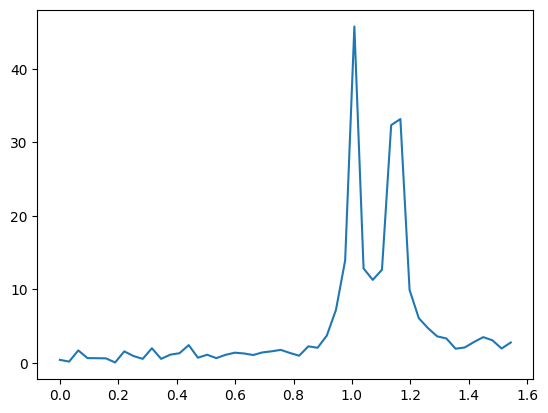

In [4]:
plt.plot(xf, np.abs(yf))
plt.show()

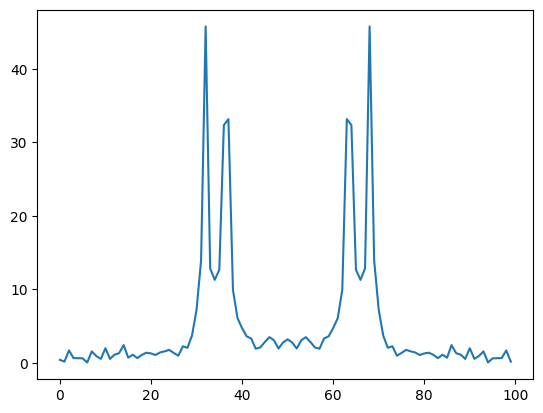

In [6]:
from scipy.fft import fft, fftfreq
N = len(y)
yf = fft(y)  
plt.plot( np.abs(yf))

# Examples

**Example 1**. The energy required to get from point $\vec{r}_1$ to point $\vec{r}_2$ for a plane is given by

$$ E = \alpha \int_{C} \left| \frac{d\vec{r}}{dt} \right| dt - \int_C \vec{F} \cdot \frac{d\vec{r}}{dt}dt $$

Suppose that $\alpha=5$ and our start and ends points are $\vec{r}_1 = (0,0)$ and $\vec{r}_2 = (0, 10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Find the optimal value of $A$ in $\vec{r}(t) = A\sin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the work. 

Then $x=A\sin(\pi t/10)$, $y=t$, and

$$\left| \frac{d\vec{r}}{dt} \right| = \sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)}$$

$$\vec{F} \cdot d\vec{r} = \begin{bmatrix} 0 \\ -2/(A\sin(\pi t/10) +1)^2\\ \end{bmatrix} \cdot \begin{bmatrix} \pi A/10 \cos(\pi t/10)\\ 1\\ \end{bmatrix} = -2/(A\sin(\pi t/10) +1)^2 $$

so that

$$ E = \int_{0}^{10} \left(5\sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)} + \frac{2}{(A\sin(\pi t/10) +100)^2}  \right) dt$$

In [46]:
def f(A): 
    integrand = lambda t: 2 / (1 + np.abs(A*np.sin(np.pi*t/10)))**2 + 5*np.sqrt(1+(np.pi*A/10)**2 * np.cos(np.pi * t / 10)**2)
    return quad(integrand, 0, 10)[0]

minimize(f, 0.001, method="CG").x

array([1.42591231])

**Example 2**: Newton's law of cooling is

$$\frac{dT}{dt} = -k(T-T_s(t)) $$

where $T$ is the temperature of an object in the surroundings with temperature $T_s(t)$ (which may depend on time). Suppose $T$ represents the temperature of a shallow pool of water and $T_s(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside:



In [47]:
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

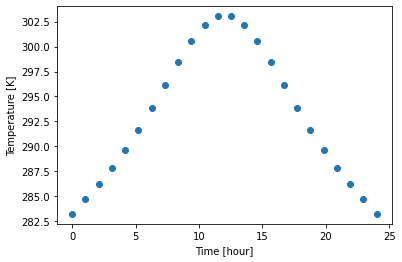

In [48]:
plt.scatter(t_m, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [49]:
Ts = interp1d(t_m, temp_m, kind='cubic')

In [50]:
def dTdt(T, t):
    return -0.5*(T-Ts(t))

times = np.linspace(1, 23, 1000)
T0 = 284.6945461

In [51]:
sol = odeint(dTdt, T0, times).T[0]

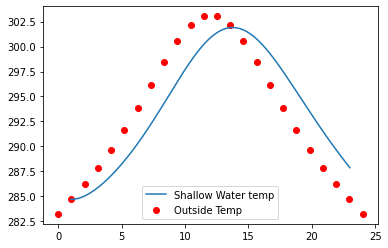

In [53]:
plt.plot(times, sol, label='Shallow Water temp')
plt.scatter(t_m, temp_m, color='r', label='Outside Temp')
plt.legend()

# Linear Algebra

## Basics

Triangular matrices

$$ \begin{bmatrix} 3 & 0 & 0 & 0\\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix} $$

In [54]:
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

Toeplitz Matrices (matrices with constant diagonals)

$$ \begin{bmatrix} 1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix} $$

In [55]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])    # First column of T
r = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c, r), b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

## Eigenvalue Problems

Eigenvalue problems can be solved using numpy, so here we focus on particular cases for optimization

In [56]:
from scipy.linalg import eigh_tridiagonal

$$ \begin{bmatrix} 3 & -1 & 0 & 0\\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda x $$

In [57]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e)

In [58]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [59]:
A@v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

In [60]:
w[0] * v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

## Special Matrices

Fiedler matrix $A_{ij} = |a_i - a_j|$ where $a_i$ is some sequence of numbers

In [61]:
from scipy.linalg import fiedler
fiedler([1, 4, 12, 45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

Toeplitz matrices (matrices with constant diagonals)

In [62]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,6,0,0], [1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [6, 3, 2, 1, 4, 5],
       [0, 6, 3, 2, 1, 4],
       [0, 0, 6, 3, 2, 1]])

https://docs.scipy.org/doc/scipy/reference/linalg.html#special-matrices

## Decompositions

LU decomposition $A = PLU$ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [63]:
from scipy.linalg import lu
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = lu(A)

Choleski decomposition: find matrix $C$ such that $A = CC^T$

In [64]:
from scipy.linalg import cholesky
A = np.array([[1,0.2],[0.2,1]])
C = cholesky(A, lower=True)

In [65]:
C

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

In [66]:
C@C.T

array([[1. , 0.2],
       [0.2, 1. ]])

In [67]:
A

array([[1. , 0.2],
       [0.2, 1. ]])

## Sparse Matrices

Matrices that contain lots of zeros (so lots of space can be reduced)

**A Useful Example**:

The second derivative of $f(x_i) \equiv f_i$ is approximated as $\frac{d^2 f_i}{dx^2} \approx \frac{f_{i+1}+f_{i-1}-2f_i}{\Delta x^2}$. Suppose we have $f_0, ... f_4$ and $f_0=f_4=0$ (boundary conditions). Then the second derivative is approximated as 

$$ D \begin{bmatrix} f_1 \\ f_2 \\ f_3\end{bmatrix} \hspace{10mm} \text{where} \hspace{2mm} D = \frac{1}{\Delta x^2}\begin{bmatrix} -2 & 1 & 0 \\ 1 & -2 & 1 \\ 0 & 1 & -2 \end{bmatrix} $$

In 2D our function can be discretized on a grid

$$\begin{bmatrix} 0 & 0 & 0 & 0 & 0 \\ 0 & f_{11} & f_{12} & f_{13} & 0 \\ 0 & f_{21} & f_{22} & f_{23} & 0 \\ 0 & f_{31} & f_{32} & f_{33} & 0 \\ 0 & 0 & 0 & 0 & 0 \end{bmatrix} $$

but when doing this sort of work, its always better to store information in a vector

$$\begin{bmatrix} 0 & 0 & 0 & 0 & 0 \\ 0 & f_{11} & f_{12} & f_{13} & 0 \\ 0 & f_{21} & f_{22} & f_{23} & 0 \\ 0 & f_{31} & f_{32} & f_{33} & 0 \\ 0 & 0 & 0 & 0 & 0 \end{bmatrix} \to \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix}$$

What does the 2D laplacian look like? It turns out it is the "Kroncker sum" of our original matrix. The second derivative is given by

$$(D \oplus D) \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix} \hspace{10mm} \text{where} \hspace{2mm} D = \frac{1}{\Delta x^2}\begin{bmatrix} -2 & 1 & 0 \\ 1 & -2 & 1 \\ 0 & 1 & -2 \end{bmatrix} $$

Note that even though $D$ is 3x3, $D \oplus D$ is 9x9.

In [68]:
from scipy.linalg import kron # kronecker product, NOT sum
N= 5
d = -2*np.ones(N)
e = np.ones(N-1)
D = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
D_kronsum = kron(D, np.identity(N)) + kron(np.identity(N),D)
D_kronsum

array([[-4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

Too big for any reasonable calculation! But can use sparse matrices

In [69]:
from scipy import sparse
N=100
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)

In [70]:
T

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

See my 2D Schrodinger video for how I use this to construct eigenstates for arbitrary potentials!

# Statistics

**Example 1**: $\beta$ distribution

$$ f(x; a, b) = \frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \hspace{20mm} 0 \leq x \leq 1$$

In [71]:
from scipy.stats import beta

Basic Statistics

In [72]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

Probability Distribution Plotting:

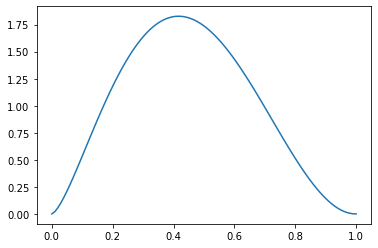

In [73]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

Generating Random Variables:

In [74]:
r = beta.rvs(a, b, size=10)
r

array([0.36519221, 0.34611788, 0.69248154, 0.79559517, 0.35850385,
       0.52820307, 0.59075396, 0.51043511, 0.48425268, 0.24519145])

**Example 2**: Gaussian Distribution

$$ f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{exp}\left(-\frac{(x-\mu)^2}{\sigma^2} \right) \hspace{20mm} -\infty < x \leq \infty $$

In [75]:
from scipy.stats import norm

In [76]:
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

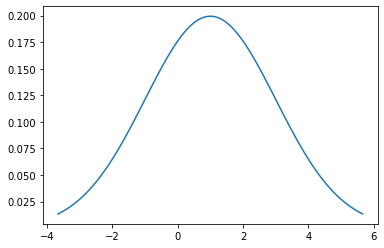

In [77]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

**Example 3**: Multinomial Distribution

$$ f(x_1, x_2, ..., x_k; p_1, p_2, ... p_k, n) = \frac{n!}{x_1! ... x_k!}p_1^{x_1}p_2^{x_2}...p_k^{x_k}$$

Rolling a die

In [78]:
from scipy.stats import multinomial

p = np.ones(6)/6
multinomial.pmf([6,0,0,0,0,0], n=6, p=p)

2.143347050754453e-05

In [79]:
multinomial.rvs(n=100, p=p, size=5)

array([[13, 28,  9, 20, 18, 12],
       [19, 17, 13, 22, 14, 15],
       [16, 13, 18, 19, 21, 13],
       [18, 11, 19, 19, 11, 22],
       [14, 14, 19, 16, 22, 15]])

**Example 4**: Generating Random Numbers from your own distribution

$$ f(x; a_1, a_2, b_1, b_2) = \frac{1}{2(a_1b_1+a_2b_2)} \left(b_1\exp\left(-\sqrt{\frac{x}{a_1}}\right)+b_2\exp\left(-\sqrt{\frac{x}{a_2}}\right)\right) \hspace{20mm} 0 \leq x \leq \infty $$

In [80]:
import scipy.stats as st

class mr_p_solver_dist(st.rv_continuous):
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
my_rv = mr_p_solver_dist(a=0, b=np.inf)

In [81]:
a1, a2, b1, b2 = 2, 3, 1, 2
x = np.linspace(my_rv.ppf(0.01, a1, a2, b1, b2), my_rv.ppf(0.99, a1, a2, b1, b2), 100)
y = my_rv.pdf(x, a1, a2, b1, b2)

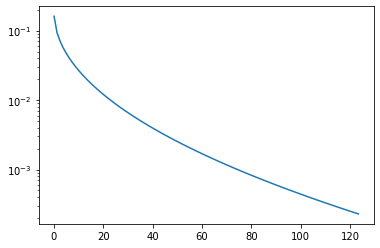

In [82]:
plt.plot(x, y)
plt.semilogy()
plt.show()

In [83]:
my_rv.rvs(a1, a2, b1, b2, size=10)

array([26.8323172 , 48.93544571, 10.41326459, 12.93854296,  1.26080927,
       51.13633979,  1.41285272,  0.68021435,  3.23102047,  0.66236715])

This is slow, so it is typical to define your own `_rvs` method in the variable class

In [84]:
class mr_p_solver_dist(st.rv_continuous):
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
    def _cdf(self, x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))* ( -2*a1*b1*(np.sqrt(x/a1)+1)*np.exp(-np.sqrt(x/a1)) \
           -2*a2*b2*(np.sqrt(x/b2)+1)*np.exp(-np.sqrt(x/b2)) \
           + 2*a1*b1 + 2*a2*b2 )
    def _rvs(self, a1, a2, b1, b2, delta=0.001, size=None, random_state=None):
        a_min = min([a1, a2])
        x = np.linspace(0, a_min*np.log(1/delta)**2, 10000)
        r = np.random.rand(size)
        return x[np.searchsorted(self._cdf(x[:-1], a1, a2, b1, b2), r)]

In [85]:
my_rv = mr_p_solver_dist(a=0, b=np.inf)
my_rv._rvs(a1, a2, b1, b2, size=10000)

array([ 3.30235238, 95.43416599, 13.13305455, ..., 13.55300687,
        0.60129538,  6.63333787])